In [1]:

from keras.preprocessing import image
from keras.preprocessing import image
from keras.models import Model
import numpy as np
import cv2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:

def named_model(name):
    # include_top=False removes the fully connected layer at the end/top of the network
    # This allows us to get the feature vector as opposed to a classification
    if name == 'Xception':
        from keras.applications.xception import Xception, preprocess_input, decode_predictions
        return Xception(weights='imagenet', include_top=False, pooling='avg')

    if name == 'VGG16':
        from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
        return VGG16(weights='imagenet', include_top=False, pooling='avg')

    if name == 'VGG19':
        from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
        return VGG19(weights='imagenet', include_top=False, pooling='avg')

    if name == 'InceptionV3':
        from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
        return InceptionV3(weights='imagenet', include_top=False, pooling='avg')

    if name == 'MobileNet':
        from keras.applications.MobileNet import Mobilenet, preprocess_input, decode_predictions
        return MobileNet(weights='imagenet', include_top=False, pooling='avg')

    if name == 'resnet' :
        from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
        return ResNet50(input_shape=(224, 224, 3),weights='imagenet', include_top=False, pooling='avg')
    else :
        print('unknow model ,please check ')






In [3]:
### use resnet as base model
base=named_model('resnet')
base.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [4]:
# make a model to extract first activation layer
activation_layer1 = base.get_layer('activation_1')

# create a model object
model1 = Model(inputs=base.input, outputs=activation_layer1.output)



In [5]:
# make a model to extract first activation layer
activation_layer2 = base.get_layer('activation_2')

# create a model object
model2 = Model(inputs=base.input, outputs=activation_layer2.output)


In [6]:
import cv2

def get_feature(img_path,model):
    try:
        if os.path.isfile(img_path):
            print('is file: {}'.format(img_path))
            try:
                # load image setting the image size to 224 x 224
                #img=cv2.imread(img_path)
                #img=cv2.resize(img, (224,224))
                img = image.load_img(img_path, target_size=(224, 224))
                # convert image to numpy array
                x = image.img_to_array(img)
                # the image is now in an array of shape (3, 224, 224)
                # but we need to expand it to (1, 2, 224, 224) as Keras is expecting a list of images
                x = np.expand_dims(x, axis=0)
                #x = preprocess_input(x)

                # extract the features
                features = model.predict(x)[0]
                # convert from Numpy to a list of values
                features_arr = np.char.mod('%f', features)

                return features_arr
            except Exception as ex:
                # skip all exceptions for now
                print(ex)
                pass
    except Exception as ex:
        # skip all exceptions for now
        print(ex)
        pass
    return None


In [7]:
import os
list_imgs=os.listdir('./celltypes/test/CYT/')
import random
rn=random.randint(0,len(list_imgs))
img_path='./celltypes/test/CYT/'+list_imgs[rn]
print("selected image located : ", img_path)
features1_arr=get_feature(img_path,model1)
features2_arr=get_feature(img_path,model2)
features1_arr.shape,features2_arr.shape

selected image located :  ./celltypes/test/CYT/200X200_CYT---7_m10293.png---7.png
is file: ./celltypes/test/CYT/200X200_CYT---7_m10293.png---7.png
is file: ./celltypes/test/CYT/200X200_CYT---7_m10293.png---7.png


((112, 112, 64), (55, 55, 64))

In [8]:
### for some reason the output numpy arr elements turned to str, need to convert them back to float
features1_arr=features1_arr.astype('float')
features2_arr=features2_arr.astype('float')


(224, 224, 3) (224, 224)


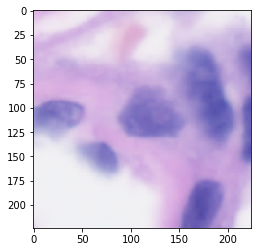

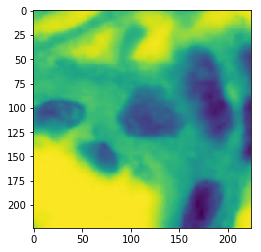

In [9]:
ori=plt.imread(img_path)
ori=cv2.resize(ori,(224,224))
gray=cv2.cvtColor(ori, cv2.COLOR_BGR2GRAY)
print(ori.shape, gray.shape)
plt.imshow(ori)
plt.show()
plt.imshow(gray)
plt.show()

(224, 224)


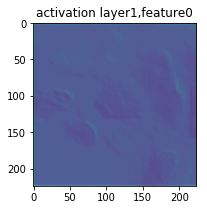

(224, 224)


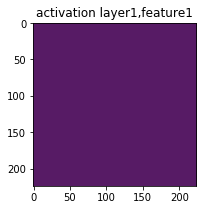

(224, 224)


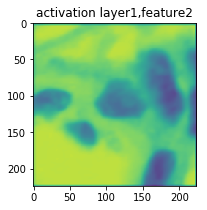

(224, 224)


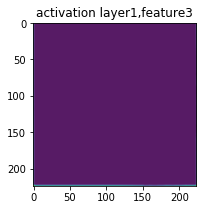

(224, 224)


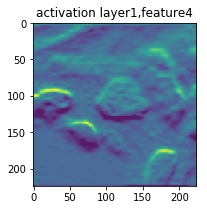

(224, 224)


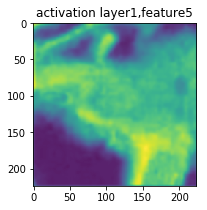

(224, 224)


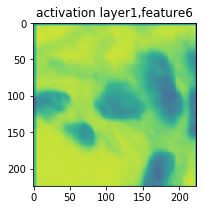

(224, 224)


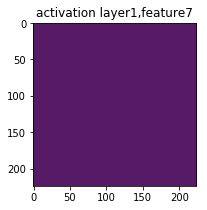

(224, 224)


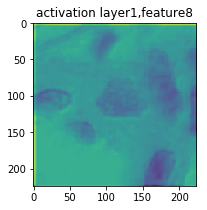

(224, 224)


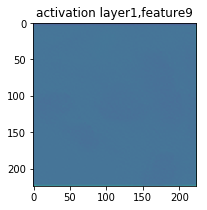

(224, 224)


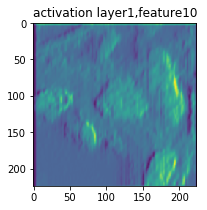

(224, 224)


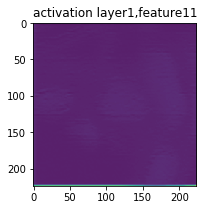

(224, 224)


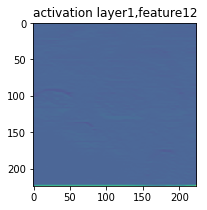

(224, 224)


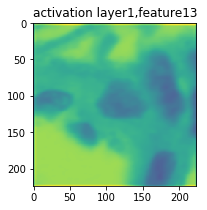

(224, 224)


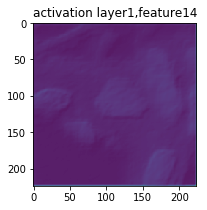

(224, 224)


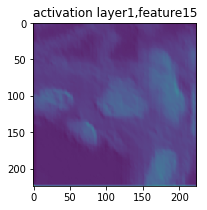

(224, 224)


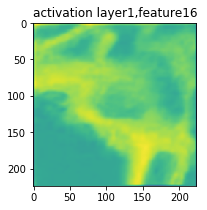

(224, 224)


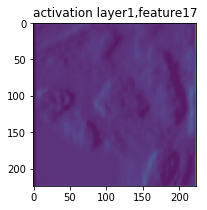

(224, 224)


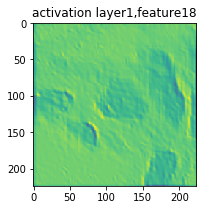

(224, 224)


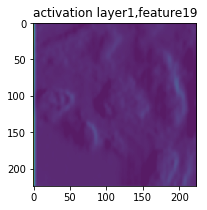

(224, 224)


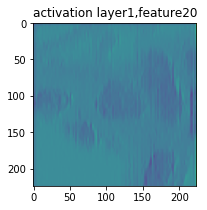

(224, 224)


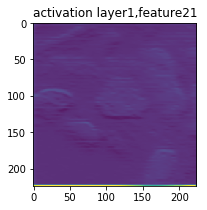

(224, 224)


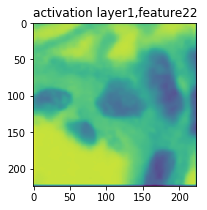

(224, 224)


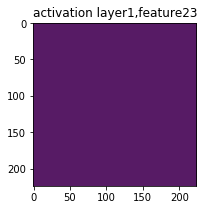

(224, 224)


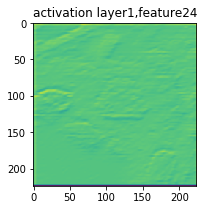

(224, 224)


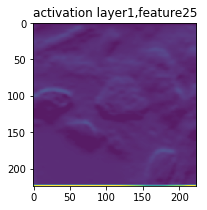

(224, 224)


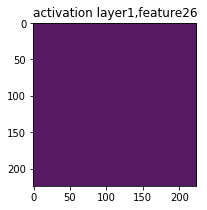

(224, 224)


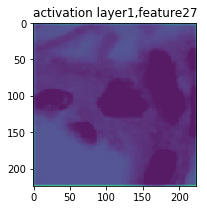

(224, 224)


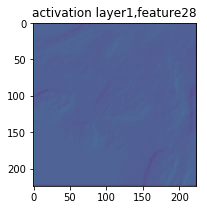

(224, 224)


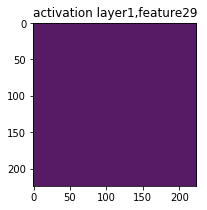

(224, 224)


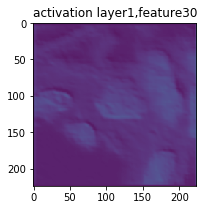

(224, 224)


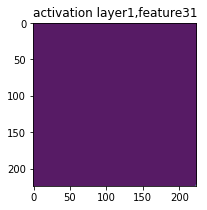

(224, 224)


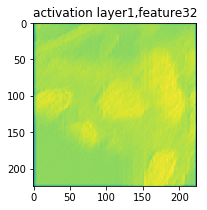

(224, 224)


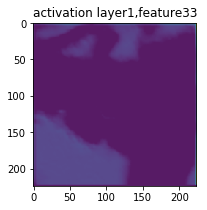

(224, 224)


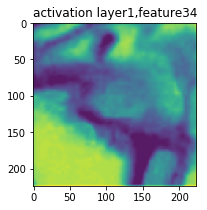

(224, 224)


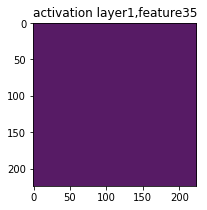

(224, 224)


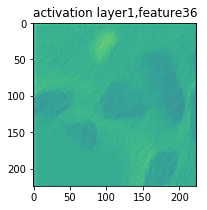

(224, 224)


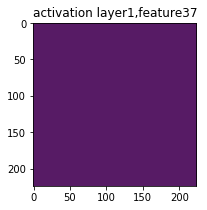

(224, 224)


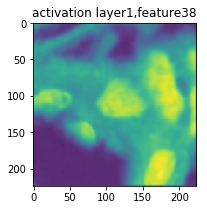

(224, 224)


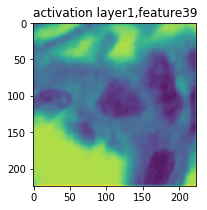

(224, 224)


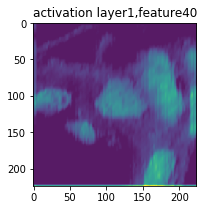

(224, 224)


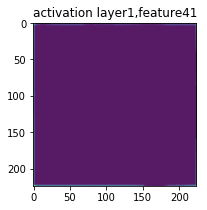

(224, 224)


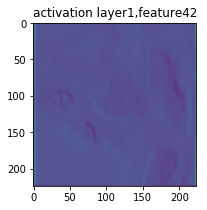

(224, 224)


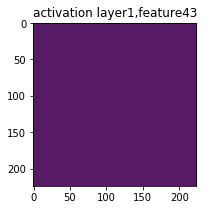

(224, 224)


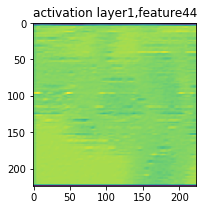

(224, 224)


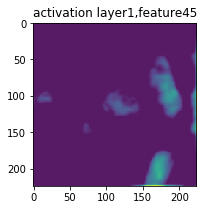

(224, 224)


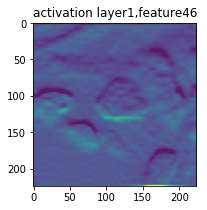

(224, 224)


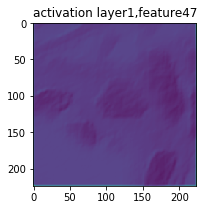

(224, 224)


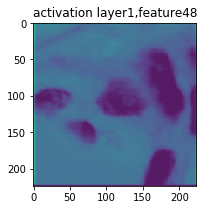

(224, 224)


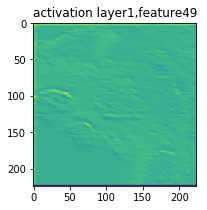

(224, 224)


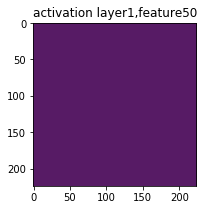

(224, 224)


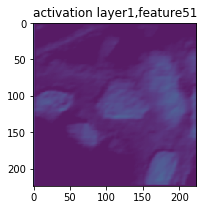

(224, 224)


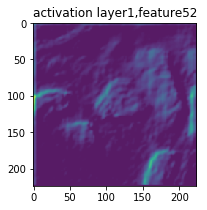

(224, 224)


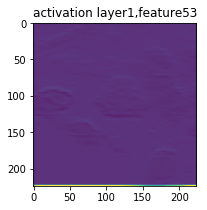

(224, 224)


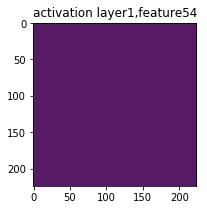

(224, 224)


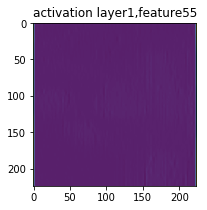

(224, 224)


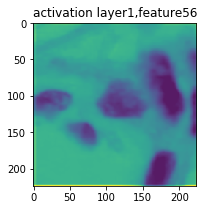

(224, 224)


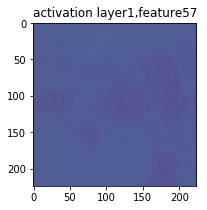

(224, 224)


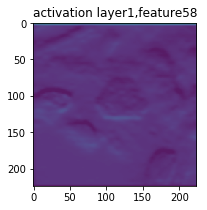

(224, 224)


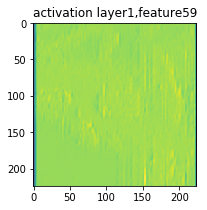

(224, 224)


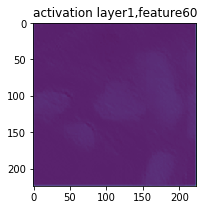

(224, 224)


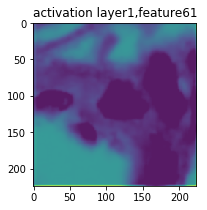

(224, 224)


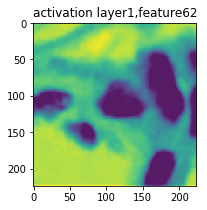

(224, 224)


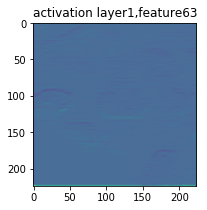

In [10]:
### plot model1 activation layer 1 extracted features ,there are 64 of them
for i in range(0,features1_arr.shape[-1]):
    plt.figure(figsize=(224,224))
    plt.subplot(1,64,i+1)
    x=np.squeeze(features1_arr[:,:,i])
    x=cv2.resize(x,(224,224))
    print(x.shape)
    plt.imshow(x,alpha=0.9)
    plt.title("activation layer1,feature{}".format(str(i)))
    plt.show()
    
plt.show()

(224, 224)


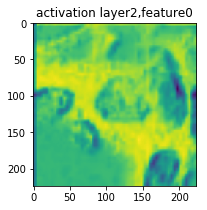

(224, 224)


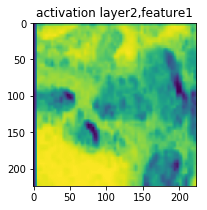

(224, 224)


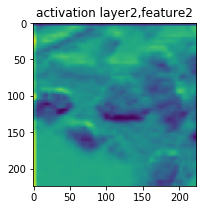

(224, 224)


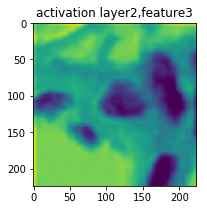

(224, 224)


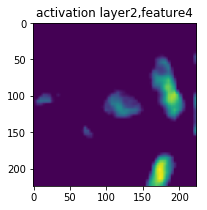

(224, 224)


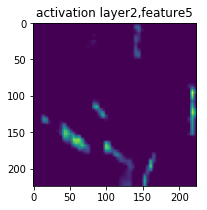

(224, 224)


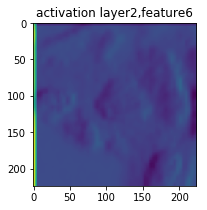

(224, 224)


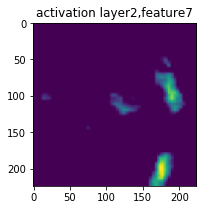

(224, 224)


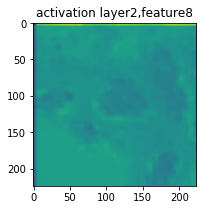

(224, 224)


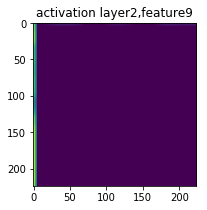

(224, 224)


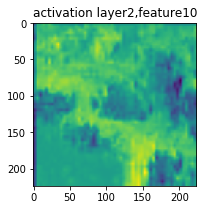

(224, 224)


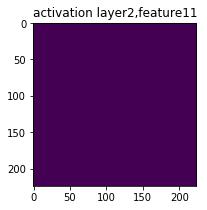

(224, 224)


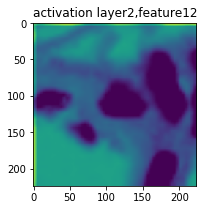

(224, 224)


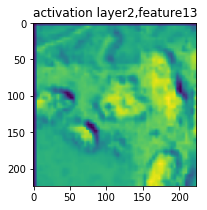

(224, 224)


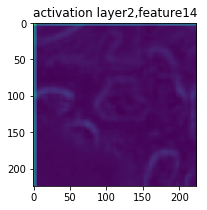

(224, 224)


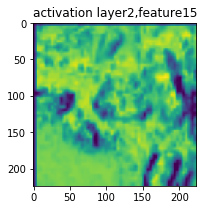

(224, 224)


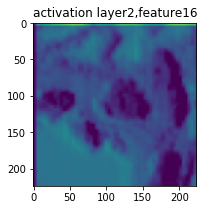

(224, 224)


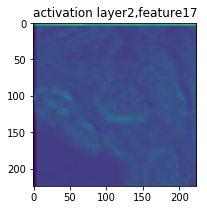

(224, 224)


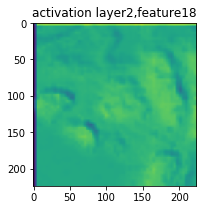

(224, 224)


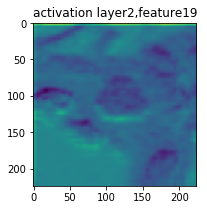

(224, 224)


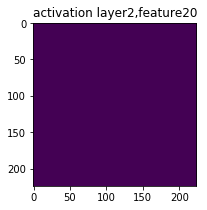

(224, 224)


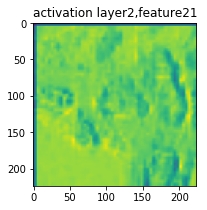

(224, 224)


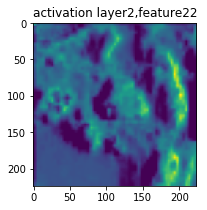

(224, 224)


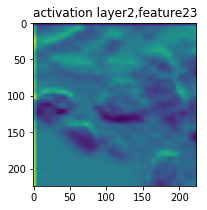

(224, 224)


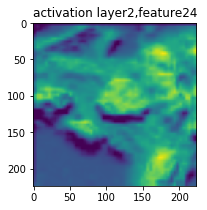

(224, 224)


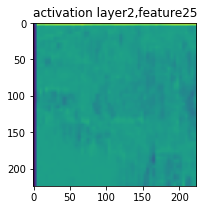

(224, 224)


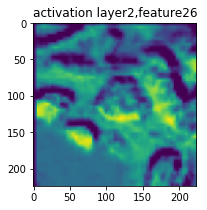

(224, 224)


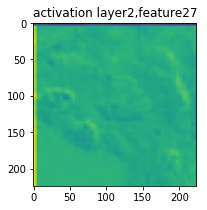

(224, 224)


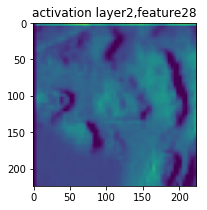

(224, 224)


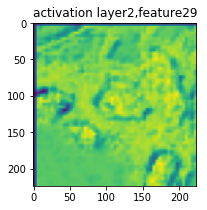

(224, 224)


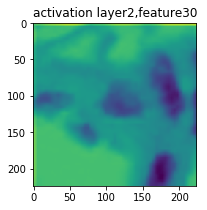

(224, 224)


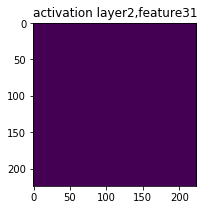

(224, 224)


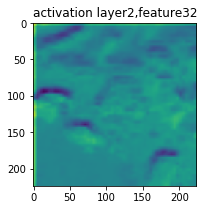

(224, 224)


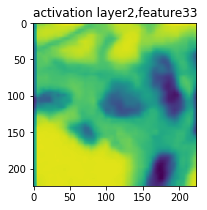

(224, 224)


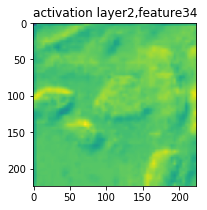

(224, 224)


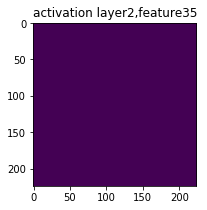

(224, 224)


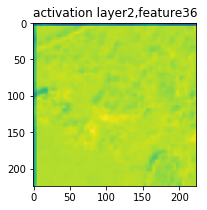

(224, 224)


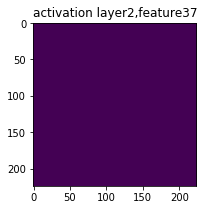

(224, 224)


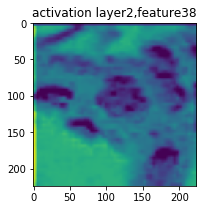

(224, 224)


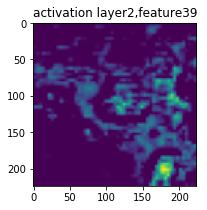

(224, 224)


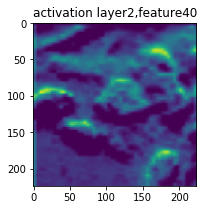

(224, 224)


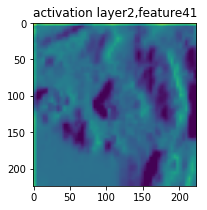

(224, 224)


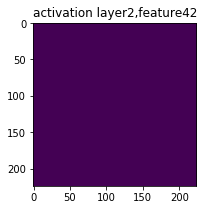

(224, 224)


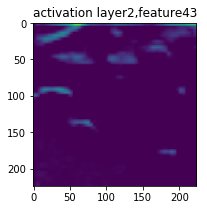

(224, 224)


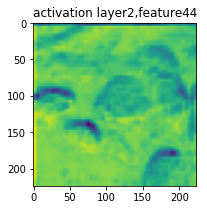

(224, 224)


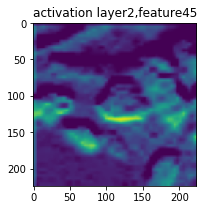

(224, 224)


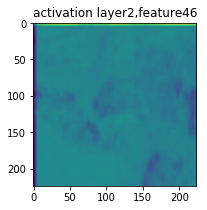

(224, 224)


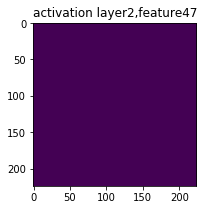

(224, 224)


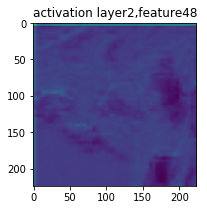

(224, 224)


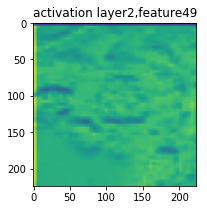

(224, 224)


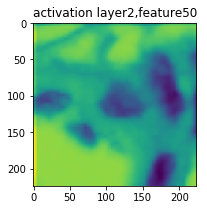

(224, 224)


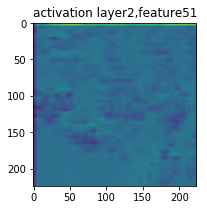

(224, 224)


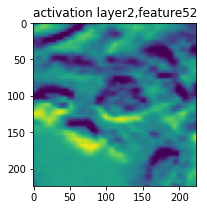

(224, 224)


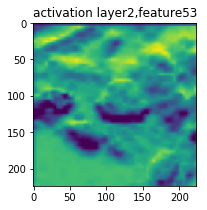

(224, 224)


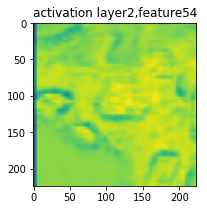

(224, 224)


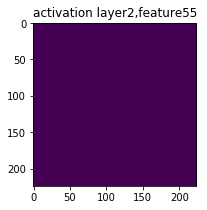

(224, 224)


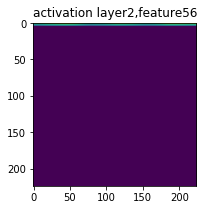

(224, 224)


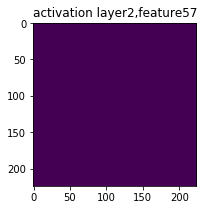

(224, 224)


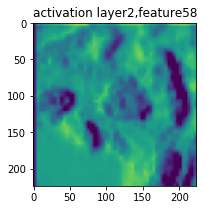

(224, 224)


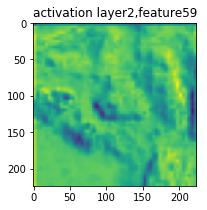

(224, 224)


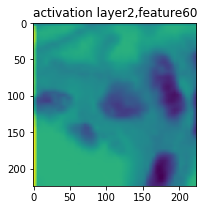

(224, 224)


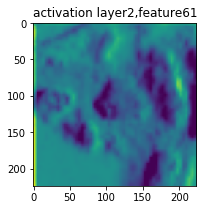

(224, 224)


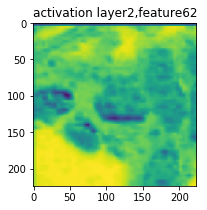

(224, 224)


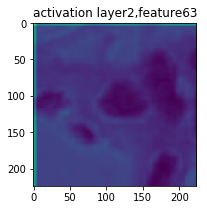

In [11]:
for i in range(0,64):
    plt.figure(figsize=(224,224))
    plt.subplot(1,64,i+1)
    x=np.squeeze(features2_arr[:,:,i])
    x=cv2.resize(x,(224,224))
    print(x.shape)
    plt.imshow(x)
    plt.title("activation layer2,feature{}".format(str(i)))
    plt.show()
    
plt.show()